# <center><font color='Green'>Capstone Project 2

Objective: The aim of this project is to choose a best Machine Learning model to predict the corona based on the symptoms from the test sample data.

Section 1: Questions to Answer

- What questions do you want to answer?

I want to find the answers for:
   - What are the prominent symptoms of corona infection?
   - Does the infection has any relation with age of a person?
   - Does contact with covid patients influence in corona test result positiveness?

- Why is your proposal important in today’s world? How predicting a disease accurately can improve medical treatment?
   - `A speedy and accurate diagnosis of COVID-19 is made possible by effective SARS-CoV-2 screening, which can also lessen the burden on healthcare systems. There have been built prediction models that assess the likelihood of infection by combining a number of parameters. These are meant to help medical professionals all over the world treat patients, especially in light of the scarcity of healthcare resources.`
   
  - `My proposal definitely has importance in today's world. The covid virus is rapidly spreading in nature. The infection could  increase rapidly in short span of time. Healthcare professionals are take samples from the individuals and analyse it in labs in order to confirm whethe the person infected with corona virus or not. It is a tedious process and time consuming. However, with advancement in technology, espacially in AI and machine learning, we can predict the whether a person has corona or not with some symptoms (factors). It can help the healthcare professionals by reducing their workload. ML models can help government in term of finance by reducing the spent on individuals who are working in analysing the test samples.`

How is it going to impact the medical field when it comes to effective screening and reducing health care burden. 
    If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any other disease.

- My proposed method can predict the corona results effeciantly. If a similar kind of situation arises in the future, my model can be used with some parameter tuning and train with new disease data. It is easily scalable and can quickly predict the result of corona test samples.

The following list describes each of the dataset’s features used by the model: 


A. Basic information: 

1. ID (Individual ID)

2. Sex (male/female). 

3. Age ≥60 above years (true/false) 

4. Test date (date when tested for COVID)


B. Symptoms: 

5. Cough (true/false).

6. Fever (true/false). 

7. Sore throat (true/false). 

8. Shortness of breath (true/false). 

9. Headache (true/false). 


C. Other information: 

10. Known contact with an individual confirmed to have COVID-19 (true/false).


D. Covid report

11. Corona positive or negative


Dataset: corona_tested_006

In [1]:
import pandas as pd # neccessary libraries have been imported
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sklearn.preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('corona_tested_006.csv',index_col='Ind_ID',na_values='None',parse_dates=True) #dataset read using pandas

In [3]:
df.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
Ind_ID,,,,,,,,,,
1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


In [4]:
df.info() #outline of the date viewed using info method

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278848 entries, 1 to 278848
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Test_date            278848 non-null  object
 1   Cough_symptoms       278596 non-null  object
 2   Fever                278596 non-null  object
 3   Sore_throat          278847 non-null  object
 4   Shortness_of_breath  278847 non-null  object
 5   Headache             278847 non-null  object
 6   Corona               278848 non-null  object
 7   Age_60_above         151528 non-null  object
 8   Sex                  259285 non-null  object
 9   Known_contact        278848 non-null  object
dtypes: object(10)
memory usage: 23.4+ MB


# <center><font color='green'>Preprocessing

In [5]:
df['Test_date']=pd.to_datetime(df['Test_date'],infer_datetime_format=True) #converted time to feature datetime datatype

In [6]:
df.duplicated().sum() #check the count of duplicate values.

272207

- Pandas duplicated method returns 272207 duplicated rows. Upon review it was found that all the features are categorical except Test_date. Test_date has repeated dates. Because, multiple patients might have been tested on the same day. Due to this combination of multiple repeated dates and repeatation of categorical features values, the duplicated method shows large number of duplicate values.

In [7]:
df.isnull().sum() #check the count of missing values.

Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

- Cough_symptoms and Fever columns had 252 missing values. Age_60_above feature had 127320 missing values and Sex feature had 19563 missing values

In [8]:
for col in df.columns[1:]:
    print(df[col].unique()) #checking the unique values in each columns

[True False nan]
[False True nan]
[True False nan]
[False True nan]
[False True nan]
['negative' 'positive' 'other']
[nan 'No' 'Yes']
[nan 'male' 'female']
['Abroad' 'Contact with confirmed' 'Other']


- Upon analysis of unique values for each feature it was found that features had some "None" values. Hence, those were replaced with nan values for missing value treatment.

In [9]:
plt.style.use('seaborn-muted')
plt.rcParams['figure.autolayout']= True
plt.rcParams['figure.figsize']=(6,3)
plt.rcParams['figure.dpi'] = 140  #setting default parameters for visuals
plt.rcParams['font.size']= 8.0
plt.rcParams['font.style']= 'italic'
plt.rcParams['xtick.labelcolor']= 'navy'
plt.rcParams['ytick.labelcolor']='navy'
plt.rcParams['figure.titleweight']= 'bold'
plt.rcParams['axes.labelcolor']= 'navy'
plt.rcParams['axes.labelsize']= 'medium'
plt.rcParams['axes.labelweight']= 'bold'
plt.rcParams['axes.titlecolor']= 'navy'
plt.rcParams['axes.titlesize']= 'large'
plt.rcParams['axes.titleweight']= 'bold'

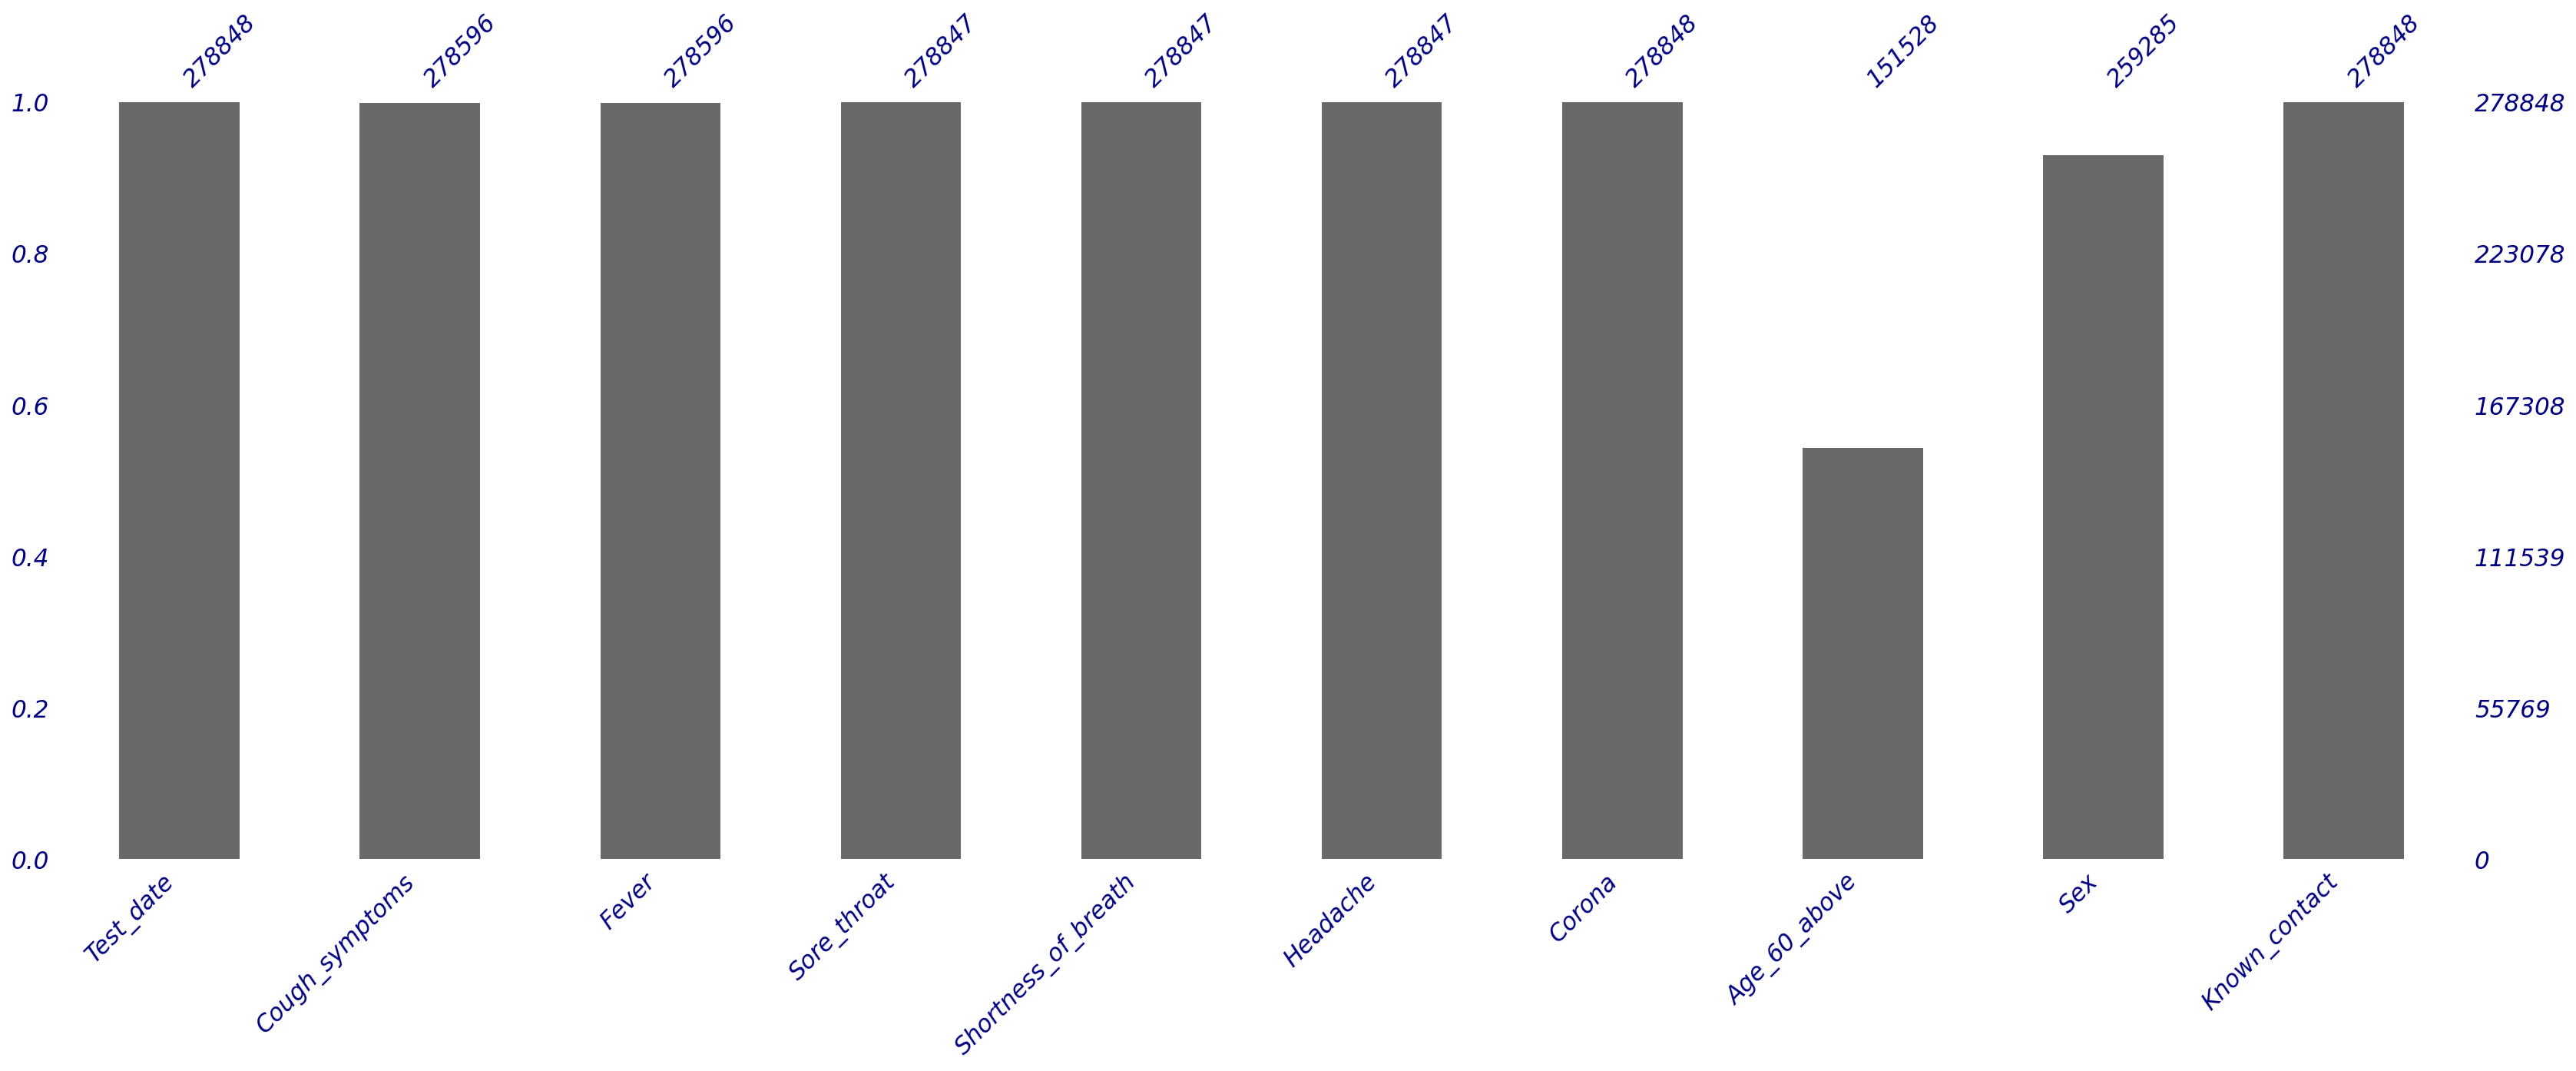

In [10]:
msno.bar(df) # plotted a bar chart to visualize the missing values.
plt.show()

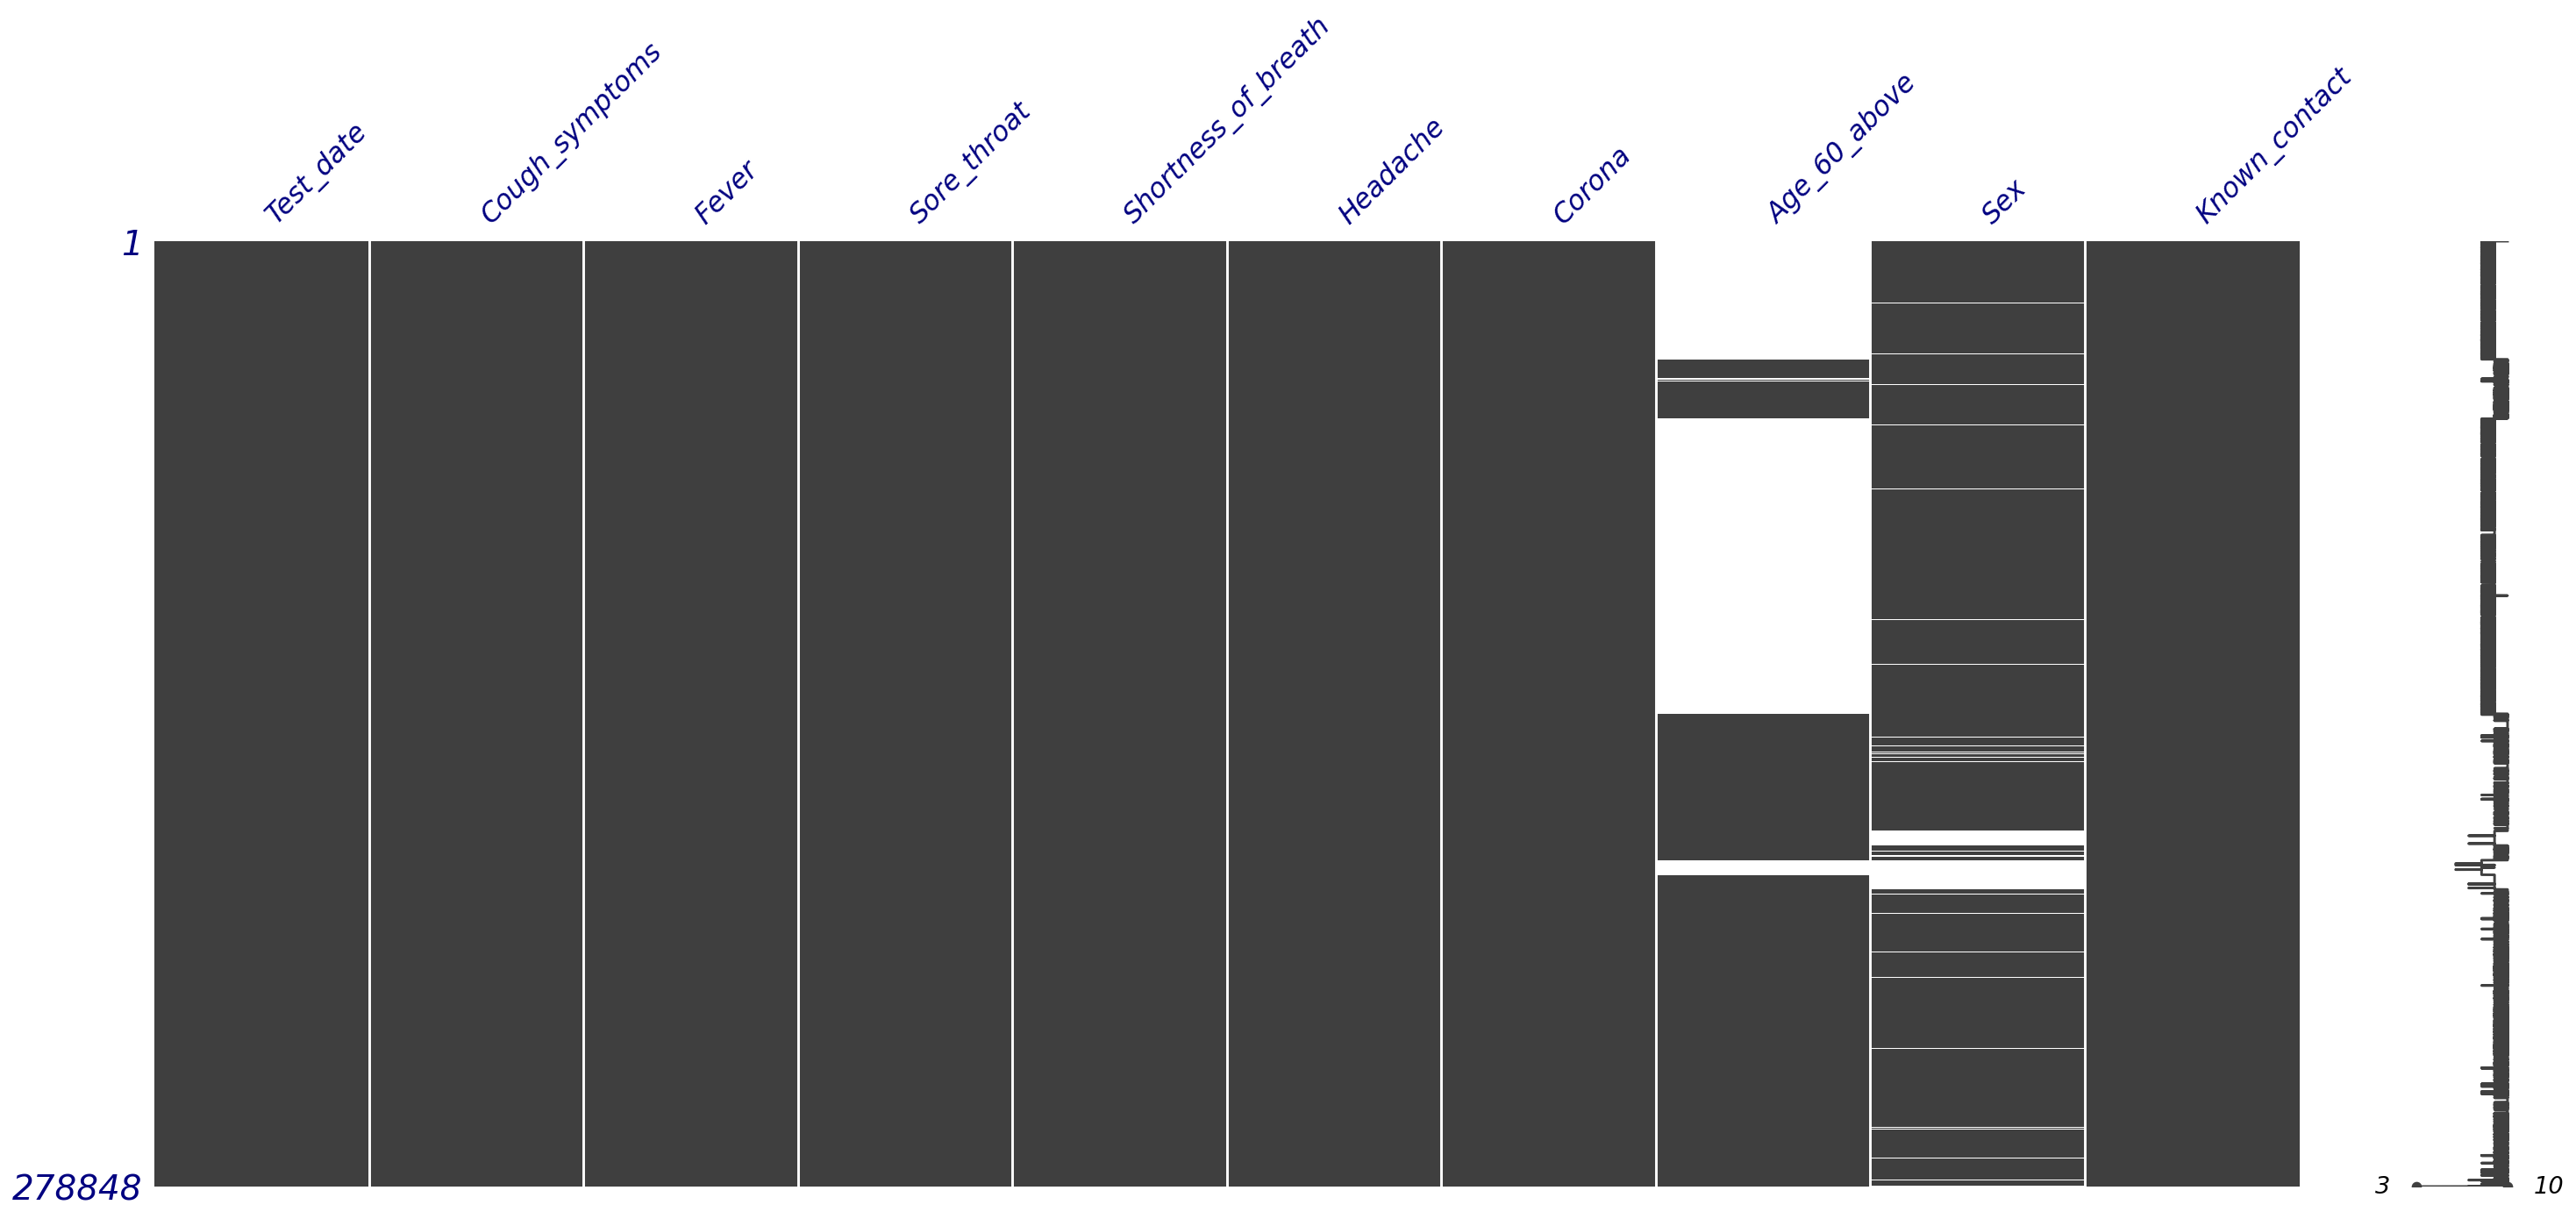

In [11]:
msno.matrix(df.sort_values('Sore_throat')) # plotted a matrix to visualize the relationship between missing values.
plt.show()

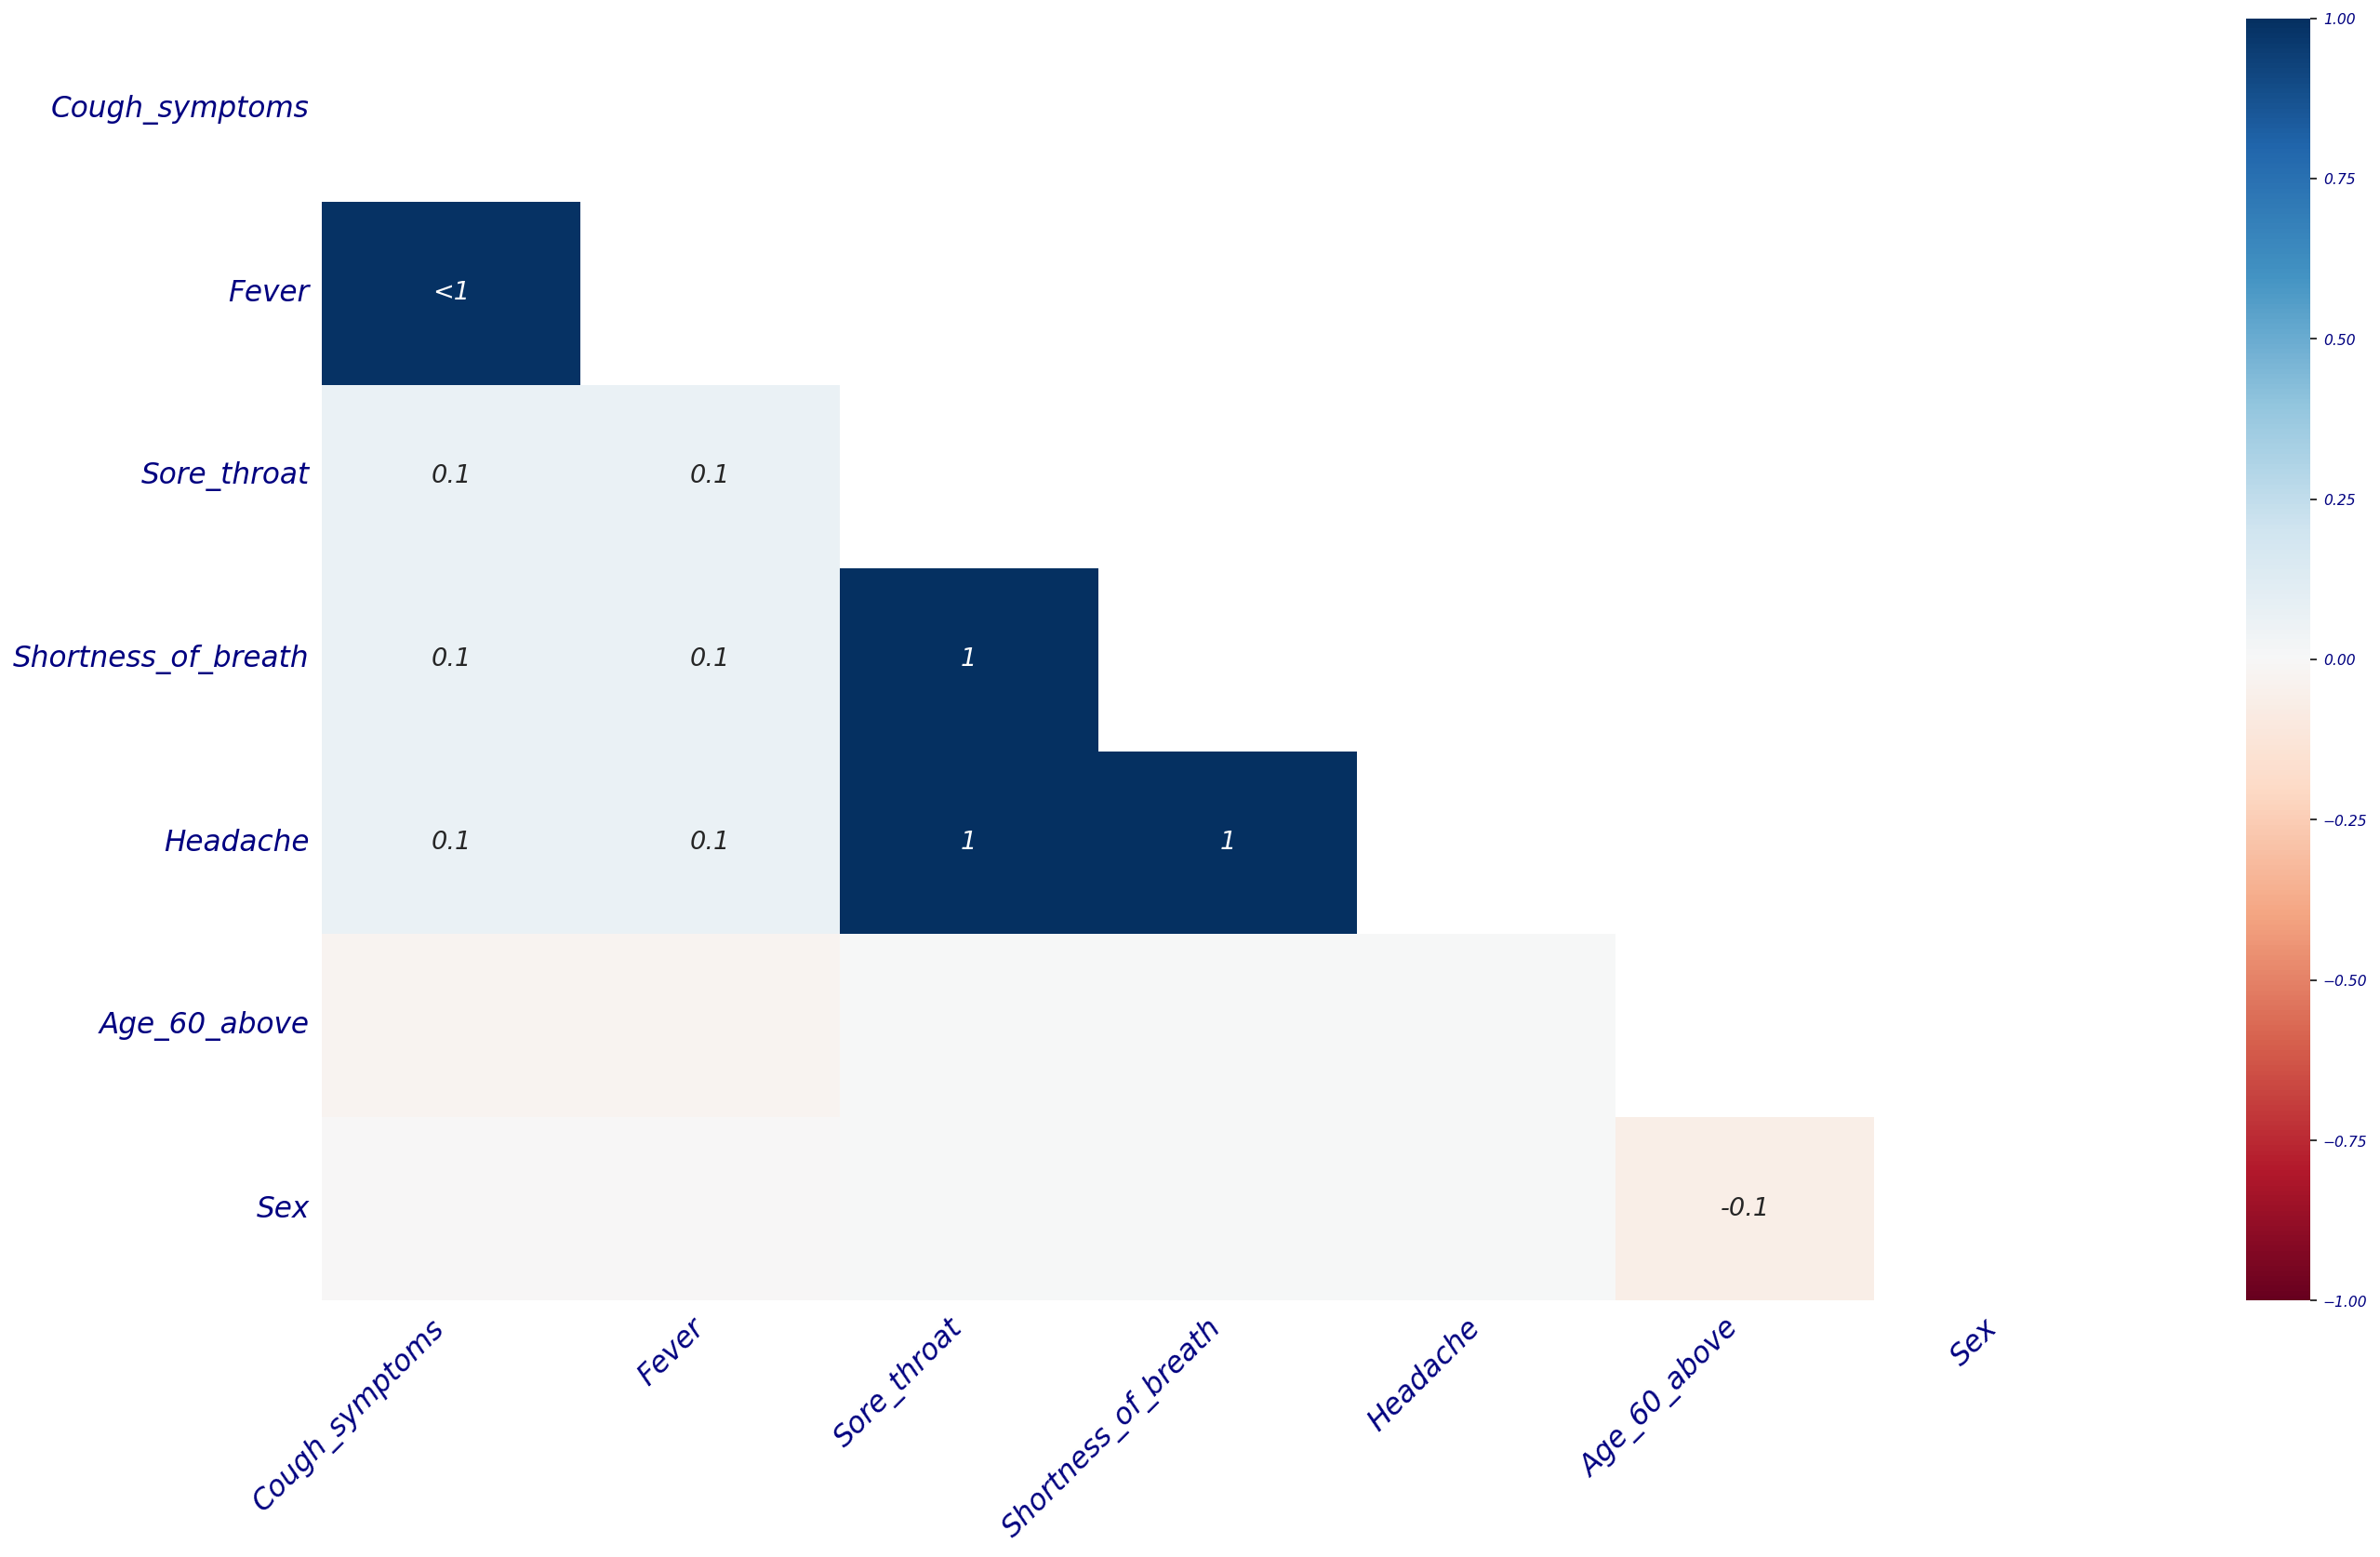

In [12]:
msno.heatmap(df) # plotted a heatmap to see the correlation between missing values.
plt.show()

- Matrix and Heatmap plots shows that 'Sore_throat','Shortness_of_breath' and 'Heatmap' had a strong positive correlation which implies that the three features are not missing at random

In [13]:
(df.isnull().sum()/df.shape[0])*100

Test_date               0.000000
Cough_symptoms          0.090372
Fever                   0.090372
Sore_throat             0.000359
Shortness_of_breath     0.000359
Headache                0.000359
Corona                  0.000000
Age_60_above           45.659284
Sex                     7.015650
Known_contact           0.000000
dtype: float64

In [14]:
df.shape

(278848, 10)

In [15]:
df.dropna(subset=['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Sex'],inplace=True)

In [16]:
# df.to_csv('corona_cleaned.csv')

In [17]:
corona=df['Corona']
df.drop(columns=['Age_60_above','Corona'],inplace=True)

- Age_60_above featurer had 45% of missing values which is around one half of the total records in the dataset. Dropping rows would lead to data loss. Hence, the particular column has been removed. For other columns, particular missing records have been removed from the dataset.

In [18]:
df['Corona']=corona

In [19]:
df.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Sex,Known_contact,Corona
Ind_ID,,,,,,,,,
13728,2020-03-22,True,False,False,False,False,male,Abroad,negative
13729,2020-03-22,True,False,False,False,False,female,Abroad,negative
13731,2020-03-22,True,True,False,False,False,female,Other,positive
13732,2020-03-22,False,False,False,False,False,female,Other,other
13733,2020-03-22,False,False,False,False,False,female,Other,other


# <center><font color='green'> Univariate Analysis

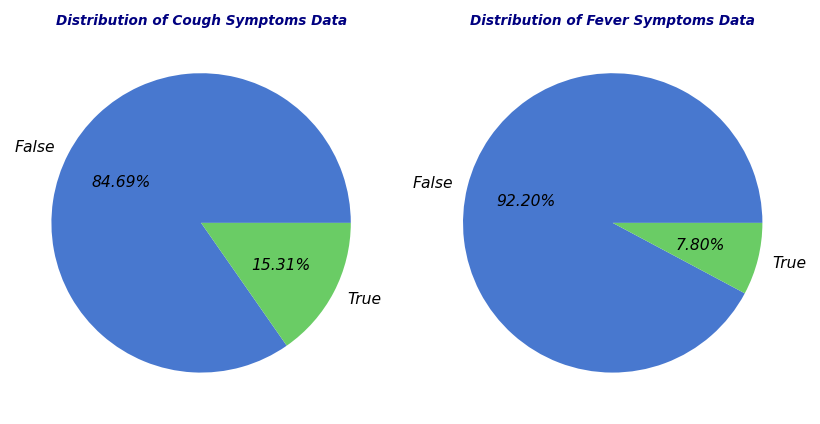

In [20]:
cs=df.Cough_symptoms.value_counts()
f=df.Fever.value_counts()
fig=plt.figure()
fig.add_subplot(1,2,1)
plt.pie(cs,autopct='%.2f%%',labels=cs.index)
plt.title('Distribution of Cough Symptoms Data',fontsize=7)
fig.add_subplot(1,2,2)
plt.pie(f,autopct='%.2f%%',labels=f.index)
plt.title('Distribution of Fever Symptoms Data',fontsize=7)
plt.show()

Insights
  - Around 84% of the total people tested does not have Cough symptoms. Only 15.16% people had cough symptoms.
  - Around 92% of the total people tested does not have Cough symptoms. Only 8% people had cough symptoms.

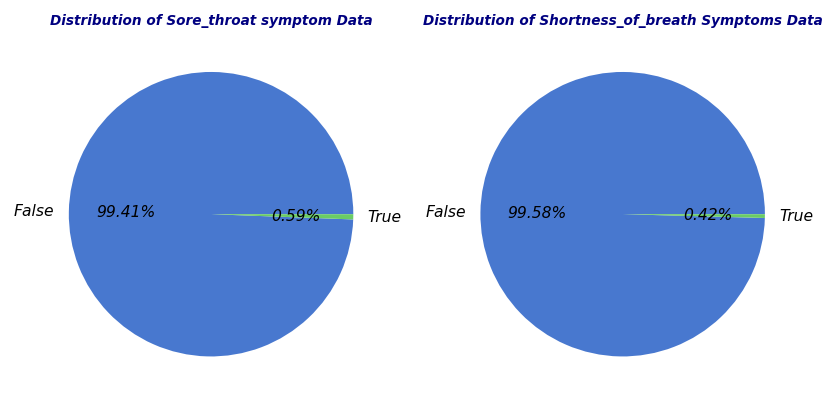

In [21]:
st=df.Sore_throat.value_counts()
sob=df.Shortness_of_breath.value_counts()

fig=plt.figure()
fig.add_subplot(1,2,1)
plt.pie(st,autopct='%.2f%%',labels=st.index)
plt.title('Distribution of Sore_throat symptom Data',fontsize=7)
fig.add_subplot(1,2,2)
plt.pie(sob,autopct='%.2f%%',labels=sob.index)
plt.title('Distribution of Shortness_of_breath Symptoms Data',fontsize=7)
plt.show()

Insights:
   - Almost all the people tested had not shown the symptom of sore_throat. Only 0.59% reported sore_throat. Based on that we can see that Sore_throat is not a prominant symptom to predict the corona.
   - Almost all the people tested had not shown the symptom of Shortness_of_breath. Only 0.57% reported Shortness_of_breath. Based on that we can see that Shortness_of_breath is not a good predictor for corona.

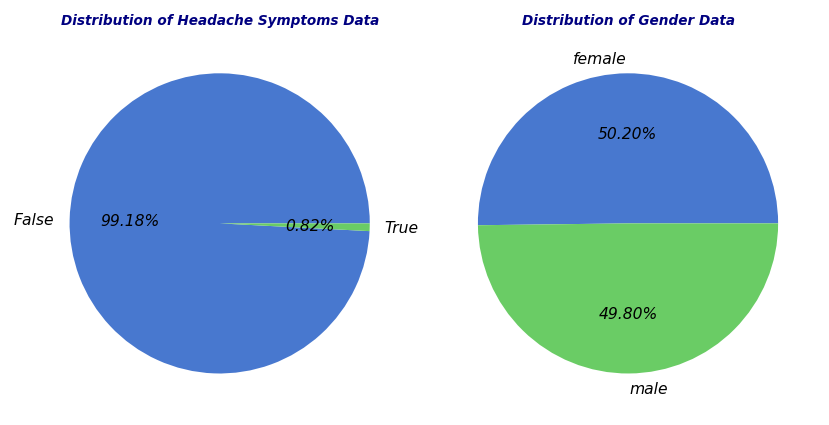

In [22]:
h=df.Headache.value_counts()
sx=df.Sex.value_counts()

fig=plt.figure()
fig.add_subplot(1,2,1)
plt.pie(h,autopct='%.2f%%',labels=h.index)
plt.title('Distribution of Headache Symptoms Data',fontsize=7)

fig.add_subplot(1,2,2)
plt.pie(sx,autopct='%.2f%%',labels=sx.index)
plt.title('Distribution of Gender Data',fontsize=7)
plt.show()

Insights:
 - Almost all the people tested had not shown the symptom of Shortness_of_breath. Only 0.87% reported Shortness_of_breath. Based on that we can see that Shortness_of_breath is not a good predictor for corona.
 - The dataset has almost balanced male and female people being tested. There is no bias between the gender in the dataset.

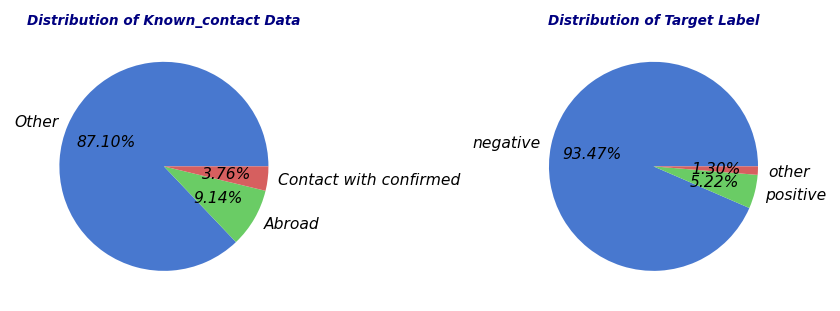

In [23]:
kc=df.Known_contact.value_counts()
tl=df.Corona.value_counts()

fig=plt.figure()
fig.add_subplot(1,2,1)
plt.pie(kc,autopct='%.2f%%',labels=kc.index)
plt.title('Distribution of Known_contact Data',fontsize=7)

fig.add_subplot(1,2,2)
plt.pie(tl,autopct='%.2f%%',labels=tl.index)
plt.title('Distribution of Target Label',fontsize=7)
plt.show()

Insights:
   - Around 87% of the people tested are not having any known contact with COVID patients. 3.8 % of people tested had confirmed contact with corona patients who have higher chance of getting corona.
   - 9.13% of people tested were returned from Abroad.
   - Distribution of Target variable shows that 93% of people tested are resulted with negative. Only 5% percent people are confirmed to be Corona Positive. Around 1.5% of data is denoted as "Other". We cannot determine whether the other denote positve or negative. Hence, I have dropped the records which have target label as other.

In [24]:
(df.Corona.value_counts()/df.shape[0])*100

negative    93.473645
positive     5.223863
other        1.302491
Name: Corona, dtype: float64

In [25]:
df.drop(index=df[df.Corona=='other'].index,inplace=True)

# <center><font color='green'>Bivariate Analysis

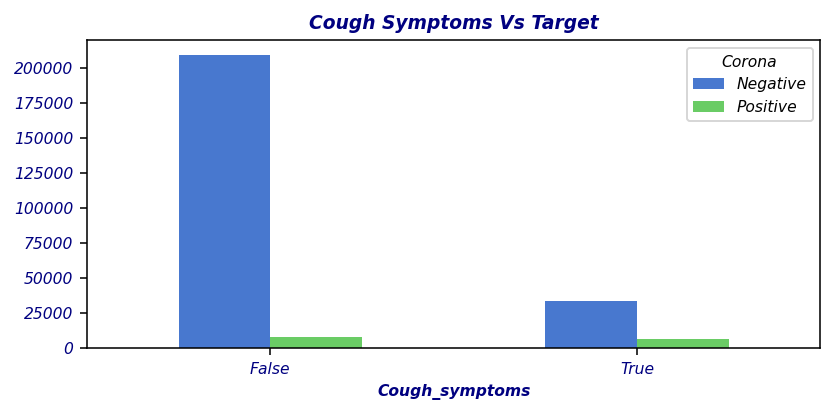

In [26]:
cs1=df.groupby(['Cough_symptoms','Corona']).size()
cs1.unstack(level=1).plot.bar(rot=0)
plt.title('Cough Symptoms Vs Target')
plt.xticks([0,1],['False','True'])
plt.legend(['Negative','Positive'],title='Corona')
plt.show()

Insights:
 - People who were tested having Cough symptoms less likely to became Corona positive.

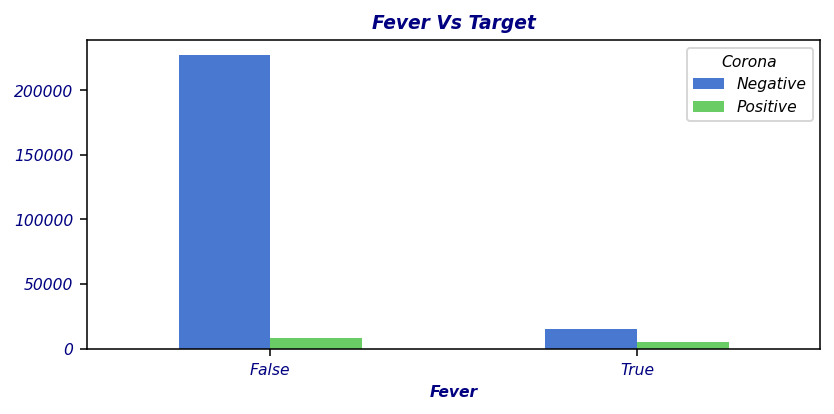

In [27]:
f1=df.groupby(['Fever','Corona']).size()
f1.unstack(level=1).plot.bar(rot=0)
plt.title('Fever Vs Target')
plt.xticks([0,1],['False','True'])
plt.legend(['Negative','Positive'],title='Corona')
plt.show()

Insights:
   - The number of people having fever with corona test results negative is higher compare to people with fever and corona positive.

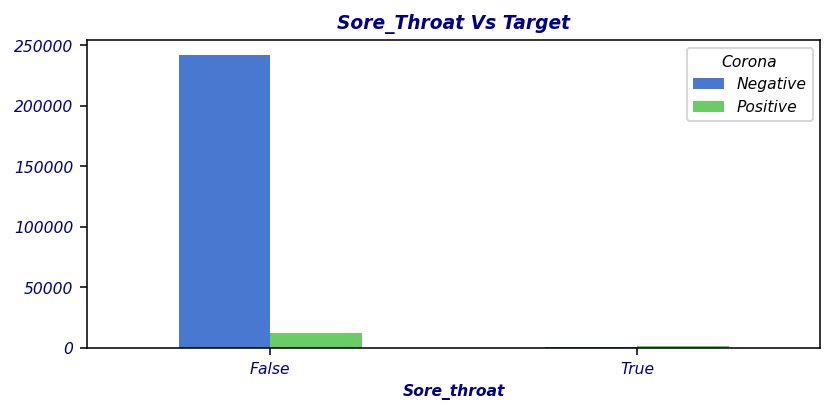

In [28]:
st1=df.groupby(['Sore_throat','Corona']).size()
st1.unstack(level=1).plot.bar(rot=0)
plt.title('Sore_Throat Vs Target')
plt.xticks([0,1],['False','True'])
plt.legend(['Negative','Positive'],title='Corona')
plt.show()

Insights:
- People with no sore throat symptom is more than people having sore throat.
- Interestingly, people who all are tested having sore throat symptom ended up with corona positive. 

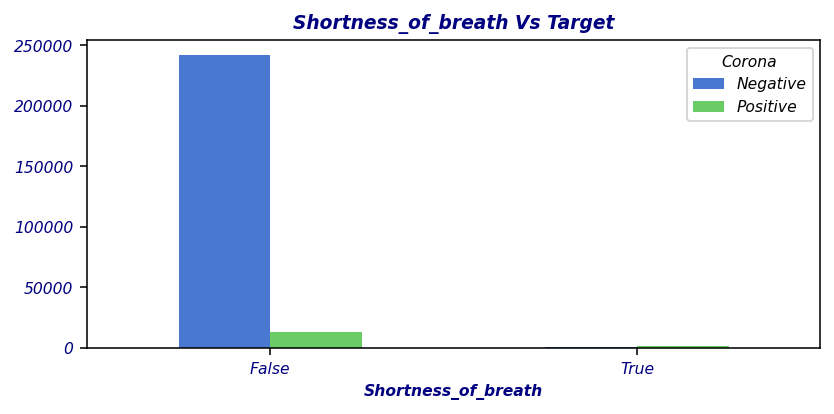

In [29]:
sb1=df.groupby(['Shortness_of_breath','Corona']).size()
sb1.unstack(level=1).plot.bar(rot=0)
plt.title('Shortness_of_breath Vs Target')
plt.xticks([0,1],['False','True'])
plt.legend(['Negative','Positive'],title='Corona')
plt.show()

Insights:
- People with no breathing issues is more than people having breathing issues.
- Interestingly, people who all are tested having breathing issues ended up with corona positive.

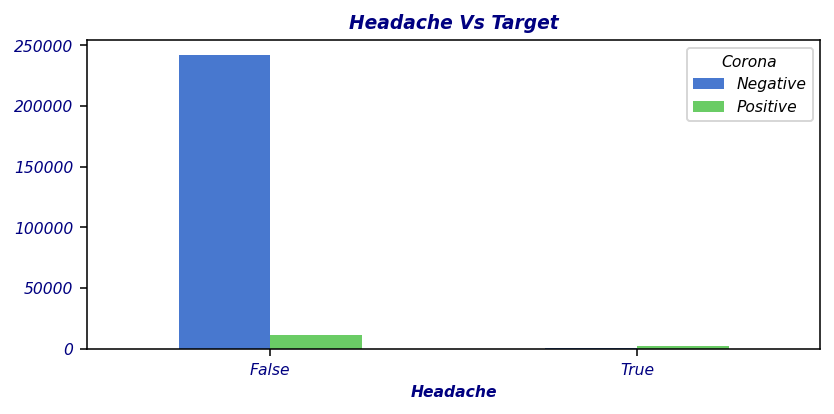

In [30]:
h1=df.groupby(['Headache','Corona']).size()
h1.unstack(level=1).plot.bar(rot=0)
plt.title('Headache Vs Target')
plt.xticks([0,1],['False','True'])
plt.legend(['Negative','Positive'],title='Corona')
plt.show()

Insights:
- Similarly, all the tested individuals who are having headache certainly having Corona. But, number of positive patients is smaller in number.

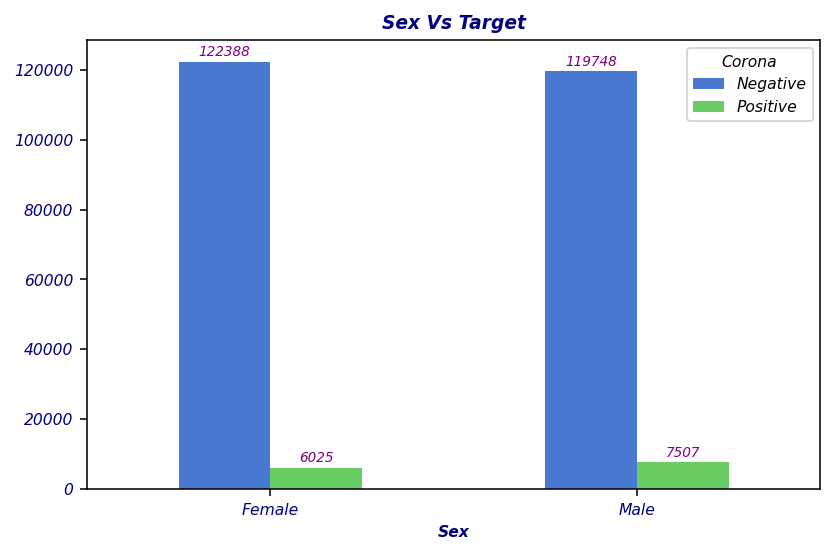

In [31]:
s1=df.groupby(['Sex','Corona']).size()
pl=s1.unstack(level=1).plot.bar(rot=0,figsize=(6,4))
pl.set_title('Sex Vs Target')
pl.set_xticks([0,1],['Female','Male'])
pl.legend(['Negative','Positive'],title='Corona')
for g in pl.patches:
    pl.annotate(format(g.get_height()),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points',fontsize=7,color='purple')
plt.show()

Insights:
- The number of corona positive male patients is higher than the number of female covid positive patients.

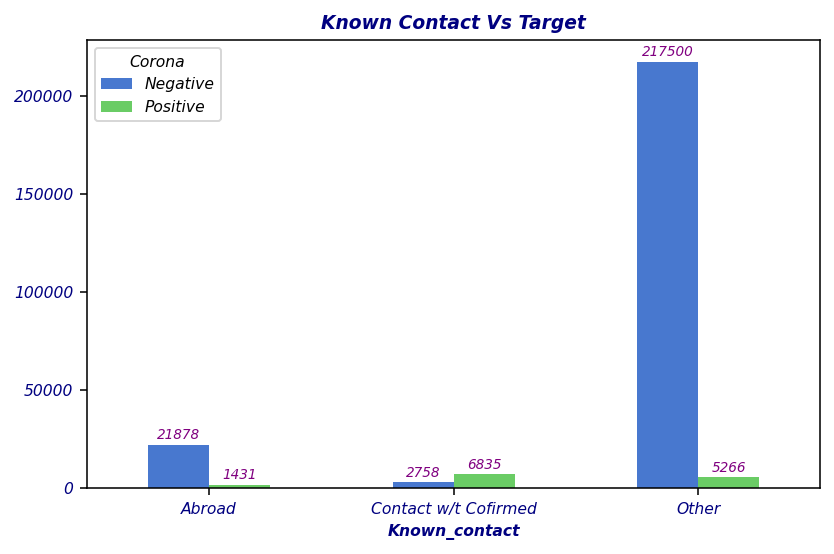

In [32]:
kc1=df.groupby(['Known_contact','Corona']).size()
pl=kc1.unstack(level=1).plot.bar(rot=0,figsize=(6,4))
pl.set_title('Known Contact Vs Target')
pl.set_xticks([0,1,2],['Abroad','Contact w/t Cofirmed','Other'])
pl.legend(['Negative','Positive'],title='Corona')
for g in pl.patches:
    pl.annotate(format(g.get_height()),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points',fontsize=7,color='purple')
plt.show()

In [36]:
df.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Sex,Known_contact,Corona
Ind_ID,,,,,,,,,
13728,2020-03-22,True,False,False,False,False,male,Abroad,negative
13729,2020-03-22,True,False,False,False,False,female,Abroad,negative
13731,2020-03-22,True,True,False,False,False,female,Other,positive
13735,2020-03-22,False,False,False,False,False,male,Other,negative
13736,2020-03-22,False,False,False,False,False,female,Other,negative


Insights:
- People tested who had contact with covid confirmed patients are being covid positive in high numbers (6835) following with other factors (5266).

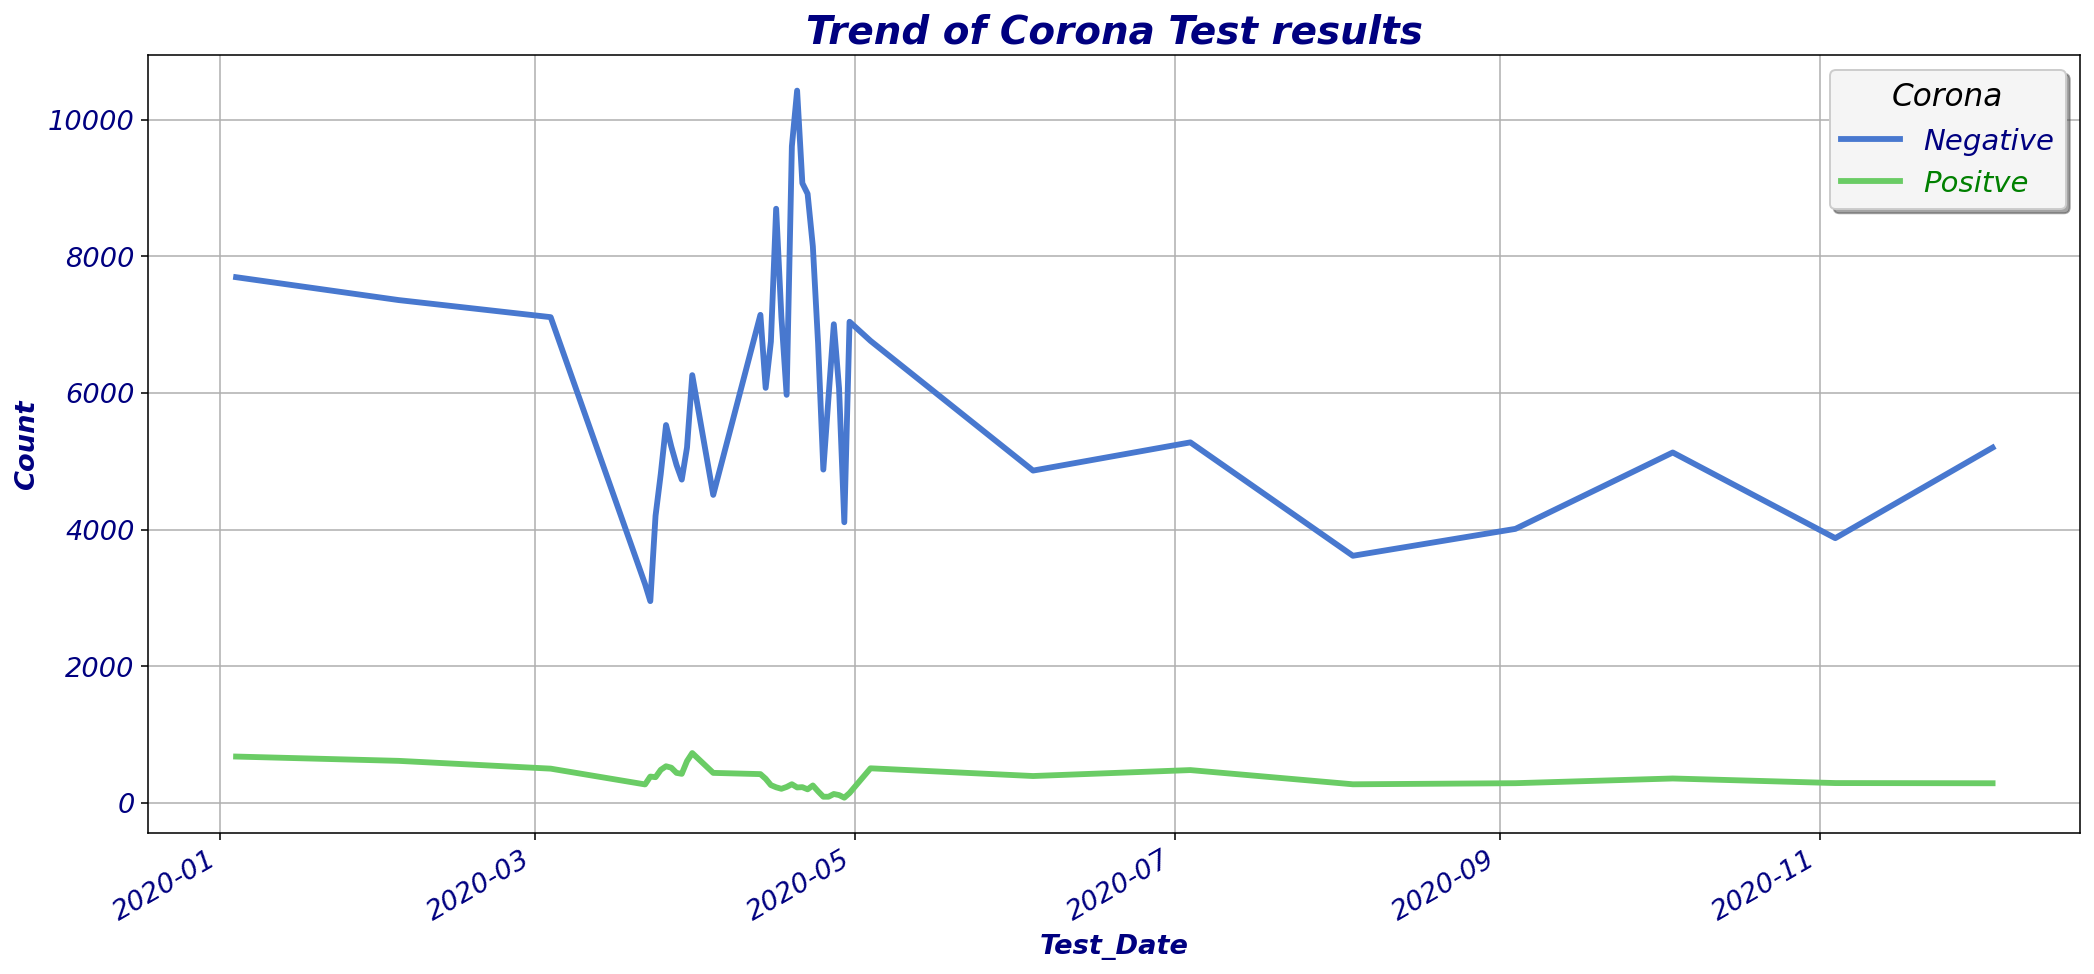

In [37]:
df[df['Corona']=='negative'].groupby('Test_date')['Corona'].count().plot(kind='line',figsize=(15,7),label='Negative',lw=3)
df[df['Corona']=='positive'].groupby('Test_date')['Corona'].count().plot(kind='line',figsize=(15,7),label='Positve',lw=3)
plt.legend(title='Corona',title_fontsize=16,labelcolor=['navy','green'],fontsize=15,fancybox=True,shadow=True,facecolor='whitesmoke')
plt.title('Trend of Corona Test results',fontsize=20)
plt.xticks(fontsize=14)
plt.xlabel('Test_Date',fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.grid()
plt.show()

Insights:
   - From the graph, we can see that rate of covid positive results is almost constant in the entire period of time except between April and May 2020. During that time there were some fluctuations could be seen in the graph.
   - There were ups and downs in the covid negative rate, which shows that the no. of tests performed is not uniform over the time. Especially during the period of April 2020 and May 2020, the no.of tests performed reached the highest and lowest point.

In [38]:
#11th March till 15th April as a training and validation set. From 16th April till 30th April as a test set
df_train=df.query("Test_date>='2020-03-11' & Test_date<='2020-04-15'")
df_train

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Sex,Known_contact,Corona
Ind_ID,,,,,,,,,
13728,2020-03-22,True,False,False,False,False,male,Abroad,negative
13729,2020-03-22,True,False,False,False,False,female,Abroad,negative
13731,2020-03-22,True,True,False,False,False,female,Other,positive
13735,2020-03-22,False,False,False,False,False,male,Other,negative
13736,2020-03-22,False,False,False,False,False,female,Other,negative
...,...,...,...,...,...,...,...,...,...
163185,2020-04-15,False,False,False,False,False,male,Other,negative
163186,2020-04-15,False,False,False,False,False,male,Other,negative
163187,2020-04-15,False,False,False,False,False,female,Other,negative


In [39]:
df_test=df.query("Test_date>='2020-04-16' & Test_date<='2020-04-30'")
df_test

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Sex,Known_contact,Corona
Ind_ID,,,,,,,,,
163190,2020-04-16,True,False,False,False,False,female,Abroad,negative
163191,2020-04-16,False,False,False,False,False,female,Other,negative
163192,2020-04-16,True,False,False,False,False,female,Abroad,negative
163193,2020-04-16,False,False,False,False,False,male,Other,negative
163194,2020-04-16,False,False,False,False,False,male,Other,negative
...,...,...,...,...,...,...,...,...,...
278844,2020-04-30,False,False,False,False,False,male,Other,positive
278845,2020-04-30,False,False,False,False,False,female,Other,negative
278846,2020-04-30,False,False,False,False,False,male,Other,negative


In [41]:
df_train.drop(columns=['Test_date'],inplace=True)
df_test.drop(columns=['Test_date'],inplace=True)

In [49]:
df_train=pd.get_dummies(df_train,drop_first=True)
df_test=pd.get_dummies(df_test,drop_first=True)

In [50]:
df_train.head()

,Cough_symptoms_True,Fever_True,Sore_throat_True,Shortness_of_breath_True,Headache_True,Sex_male,Known_contact_Contact with confirmed,Known_contact_Other,Corona_positive
Ind_ID,,,,,,,,,
13728,1,0,0,0,0,1,0,0,0
13729,1,0,0,0,0,0,0,0,0
13731,1,1,0,0,0,0,0,1,1
13735,0,0,0,0,0,1,0,1,0
13736,0,0,0,0,0,0,0,1,0


In [51]:
x_train=df_train.drop('Corona_positive',axis=1)
y_train=df_train['Corona_positive']

x_test=df_test.drop('Corona_positive',axis=1)
y_test=df_test['Corona_positive']

In [46]:
from sklearn.feature_selection import SelectKBest,chi2

In [52]:
sk=SelectKBest(score_func=chi2,k='all')
sk.fit(x_train,y_train)

SelectKBest(k='all', score_func=<function chi2 at 0x0000025F8BA49040>)

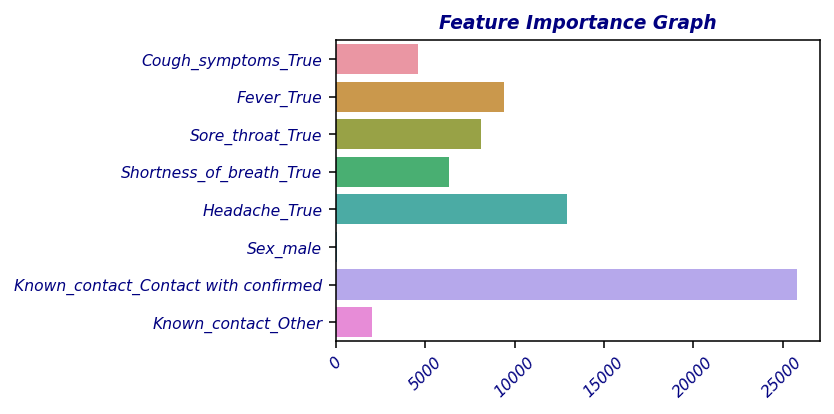

In [54]:
sns.barplot(y=x_train.columns,x=sk.scores_)
plt.xticks(rotation=45)
plt.title('Feature Importance Graph')
plt.show()

- Sex_male feature having less importance in the prediction of corona positive patients compare to other features. Hence, I am planning to drop the feature from the dataset

In [55]:
x_train.drop('Sex_male',axis=1,inplace=True)
x_test.drop('Sex_male',axis=1,inplace=True)

In [56]:
y_train.value_counts()

0    71530
1     6229
Name: Corona_positive, dtype: int64

- The number of Postive labels and Negative labels are not equal. If we build the model with this data, it might create a bias in the model prediction. In order avoid the bias, we need to perform downsampling to make the data labels balanced.

In [57]:
from imblearn.under_sampling import RandomUnderSampler

In [58]:
rm=RandomUnderSampler(sampling_strategy=1,random_state=42)
x_train,y_train=rm.fit_resample(x_train,y_train)

In [60]:
y_train.value_counts()

0    6229
1    6229
Name: Corona_positive, dtype: int64

- We can see that the data has became balanced after downsampling using RandomUnderSampler

# <center><font color='green'>Model Building

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score,precision_score, recall_score,f1_score,RocCurveDisplay,roc_auc_score,roc_curve

In [148]:
def parameter_tuning(model,param_grid):
    gcv=GridSearchCV(model,param_grid=param_grid,cv=10,scoring='recall',verbose=3)

    gcv.fit(x_train,y_train)

    return gcv.best_estimator_

# <center><font color='green'>Model 1: Logistic Regression

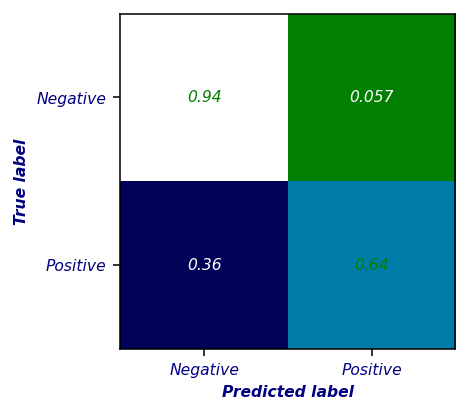

In [210]:
lr=LogisticRegression(C=0.1, max_iter=50)
lr.fit(x_train,y_train)
plot_confusion_matrix(lr,x_test,y_test,display_labels=['Negative','Positive'],normalize='true',cmap='ocean',colorbar=False)
plt.show()

In [157]:
# param_grid=dict(C=[0.0001,0.001,0.01,0.1],max_iter=[50,100,200,300,400,500],penalty=['l1','l2'])
# parameter_tuning(lr,param_grid)

In [158]:
from sklearn.model_selection import GridSearchCV

# <center><font color='green'>Model 2: Support Vector Machine

In [159]:
svc=SVC(C=0.01, gamma=1)
svc.fit(x_train,y_train)

SVC(C=0.01, gamma=1)

In [160]:
# params_grid=dict(C=[0.01,0.1,1,10,100],gamma=[0.1,1,10])

# parameter_tuning(svc,params_grid)

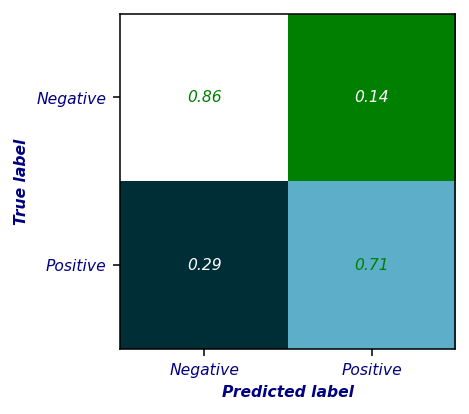

In [209]:
plot_confusion_matrix(svc,x_test,y_test,display_labels=['Negative','Positive'],normalize='true',cmap='ocean',colorbar=False)
plt.show()

# <center><font color='green'>Model 3: Random Forest Classifier

In [161]:
rfc=RandomForestClassifier(max_depth=5, max_leaf_nodes=7, n_estimators=50)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=7, n_estimators=50)

In [162]:
# params_grid = dict(n_estimators=[50,100,200,300,400],
#     max_depth=list(range(2,8)),max_leaf_nodes=list(range(1,15,2)))
# parameter_tuning(rfc,params_grid)

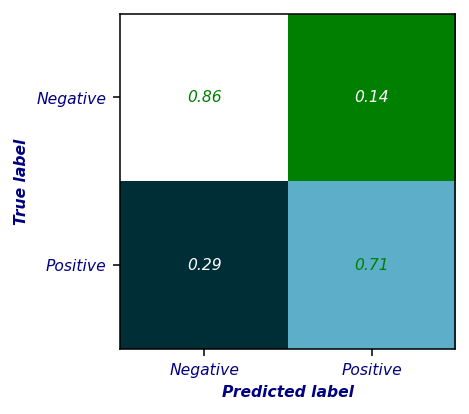

In [208]:
plot_confusion_matrix(rfc,x_test,y_test,display_labels=['Negative','Positive'],normalize='true',cmap='ocean',colorbar=False)
plt.show()

# <center><font color='green'>Model 4: XGBoost Classifier

In [164]:
xgb=XGBClassifier(max_depth=4,learning_rate=0.01,n_estimators=50)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

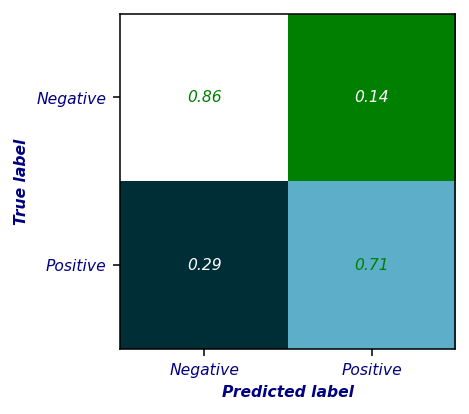

In [207]:
plot_confusion_matrix(xgb,x_test,y_test,display_labels=['Negative','Positive'],normalize='true',cmap='ocean',colorbar=False)
plt.show()

In [166]:
# params_grid = dict(n_estimators=[50,100,200,300],learning_rate=[0.01,0.05,0.1,0.3,0.5],max_depth=list(range(2,6)))
# parameter_tuning(xgb,params_grid)

# <center><font color='green'>Model 5: LightGBM Classifier

In [167]:
lgb=LGBMClassifier(learning_rate=0.05, max_depth=4, n_estimators=200)
lgb.fit(x_train,y_train)

LGBMClassifier(learning_rate=0.05, max_depth=4, n_estimators=200)

In [168]:
# params_grid = dict(n_estimators=[100,200,300,400,500],learning_rate=[0.01,0.05,0.1,0.3,0.5],max_depth=list(range(2,6)))
# parameter_tuning(lgb,params_grid)

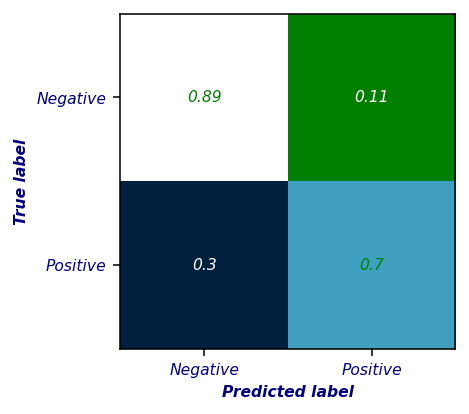

In [206]:
plot_confusion_matrix(lgb,x_test,y_test,display_labels=['Negative','Positive'],normalize='true',cmap='ocean',colorbar=False)
plt.show()

# <center><font color='green'>Model 6: KNN Classifier

In [170]:
from sklearn.neighbors import KNeighborsClassifier

In [211]:
knn=KNeighborsClassifier(leaf_size=5, n_neighbors=20)
knn.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=5, n_neighbors=10)

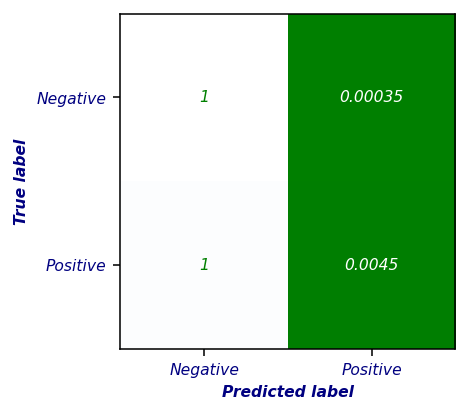

In [212]:
plot_confusion_matrix(knn,x_test,y_test,display_labels=['Negative','Positive'],normalize='true',cmap='ocean',colorbar=False)
plt.show()

In [172]:
# param_grid={'n_neighbors':list(range(5,31,5)),'leaf_size':list(range(5,51,5))}
# parameter_tuning(knn,param_grid)

# <center><font color='green'>Performance Evaluation

In [174]:
from sklearn.model_selection import cross_val_score

In [175]:
models={'LogisticRegression':lr,'SVM':svc,'RandomForest':rfc,'XGBoost':xgb,'LightGBM':lgb,'KNN':knn}
performance_test={}
performance_train={}
cv_score={}
for mname,val in models.items():

    val.fit(x_train,y_train)
    y_pred_test=val.predict(x_test)
    y_pred_train=val.predict(x_train)

    Accuracy_train=round(accuracy_score(y_train,y_pred_train)*100,2)
    Accuracy_test=round(accuracy_score(y_test,y_pred_test)*100,2)
    
    Precision_train=round(precision_score(y_train,y_pred_train)*100,2)
    Precision_test=round(precision_score(y_test,y_pred_test)*100,2)
    
    Recall_train=round(recall_score(y_train,y_pred_train)*100,2)
    Recall_test=round(recall_score(y_test,y_pred_test)*100,2)
    
    f1_train=round(f1_score(y_train,y_pred_train)*100,2)
    f1_test=round(f1_score(y_test,y_pred_test)*100,2)
    
    performance_train[mname]=[Accuracy_train,Precision_train,Recall_train,f1_train]
    performance_test[mname]=[Accuracy_test, Precision_test, Recall_test,f1_test]
    
    cvs=cross_val_score(val,x_train,y_train,cv=10,scoring='f1')
    cv_score[mname]=cvs.mean()*100

In [176]:
perf_df_train=pd.DataFrame(performance_train,index=['Accuracy','Precision','Recall','F1']).T
perf_df_test=pd.DataFrame(performance_test,index=['Accuracy','Precision','Recall','F1']).T
perf_df_cv=pd.DataFrame(cv_score,index=['cross_val_score']).T

In [177]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['<b>Model Name','<b>Accuracy (%)','<b>Precision (%)','<b>Recall (%)','<b>F1-Score (%)'],
                fill_color='darkmagenta',line=dict(color='white',width=3),font=dict(size=14,color='white'),
                align='center',height=45),
    cells=dict(values=[perf_df_train.index,perf_df_train.Accuracy,perf_df_train.Precision,perf_df_train.Recall,perf_df_train.F1],
               fill_color='greenyellow',line=dict(color='white',width=3),font=dict(size=13),
               align='center',height=45))
])
fig.update_layout(title=dict(text='<b>Performance Metrics of Train Data',font=dict(size=18),x=0.5))
fig.show()

In [178]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['<b>Model Name','<b>Accuracy (%)','<b>Precision (%)','<b>Recall (%)','<b>F1-Score (%)'],
                fill_color='darkmagenta',line=dict(color='white',width=3),font=dict(size=14,color='white'),
                align='center',height=45),
    cells=dict(values=[perf_df_test.index,perf_df_test.Accuracy,perf_df_test.Precision,perf_df_test.Recall,perf_df_test.F1],
               fill_color='greenyellow',line=dict(color='white',width=3),font=dict(size=13,color='black'),
               align='center',height=45))
])

fig.update_layout(title=dict(text='<b>Performance Metrics of Test Data',font=dict(size=18),x=0.5))
fig.show()

In [181]:
f=px.bar(perf_df_cv,y='cross_val_score',text_auto=True)
f.update_traces(textposition='outside',textfont=dict(color='darkviolet'),texttemplate='<b>%{y:.2f}%',marker=dict(color='#11aaaa',pattern=dict(shape='x',size=7,
                                                                                                         fgcolor='black',bgcolor='#11aaaa'),line=dict(color='chartreuse', width=3)))
f.update_layout(title_x=0.5,title_text='<b>Cross Validation Score',font=dict(color='navy',size=14),xaxis=dict(title='Model Names'),yaxis=dict(title='Cross_val_score'))

<IPython.core.display.Javascript object>

# <center><font color='green'>Final Model

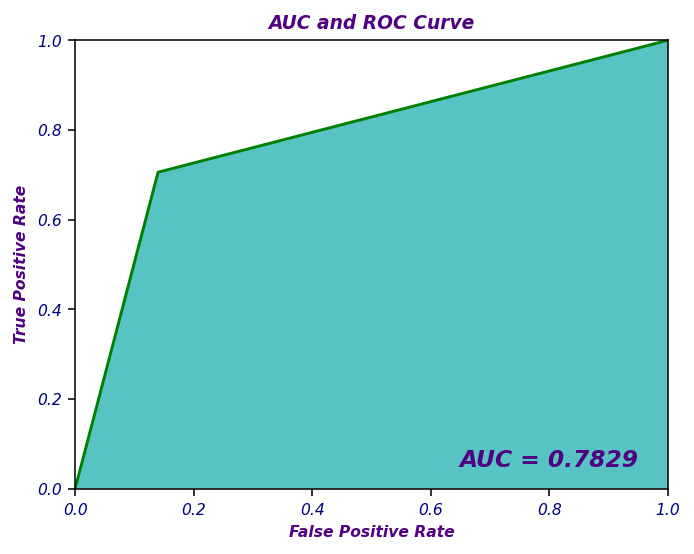

In [219]:
auc = roc_auc_score(y_test, svc.predict(x_test)) #plotting the AUC & ROC curve for the Final Model

false_positive_rate, true_positive_rate, thresolds = roc_curve(y_test, svc.predict(x_test))
plt.figure(figsize=(5,4))
plt.axis('auto')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC and ROC Curve",color='#500181')
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='#11aaaa', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='#500181')
plt.xlabel("False Positive Rate",color='#500181')
plt.ylabel("True Positive Rate",color='#500181')
plt.show()

In [231]:
import pickle
with open('covidmodel.pickle','wb') as f:
    pickle.dump(svc,f)

In [228]:
svc.predict([[1,1,1,1,0,0,0]])[0]

1

**Summary:**
   - I have imported the necessary modules for the project and check the outline of the data.
   - I did preprocessing steps to **treat the missing values.**
   - I did exploratory analysis to **visualize the distribution of the different features and to identify the relationship between multiple features.**
   - I used feature engineering techniques like **Label and OneHot Encoding Techniques** to encode the data.
   - I used **RandomUnderSampler method** to treat the **imbalance nature of the dataset.**
   - I have used <font color=' darkviolet'>***6 Models (Logistic Regression, KNN, Random Forest, XGBoost, LightGBM and SVM)***</font> 
for this project.
   - I have evaluated the performance of the various models using **Accuracy, Precision, Recall and F1-Score.**
   - Based on the Performance Evaluation, it was found that **SVM,XGBoost and LightGBM models did well in predicting the target label.**
   - Based on the activities I have performed, I am concluding that <font color='mediumorchid'>**SVM is the best for predicting (Average Accuracy - 86.73%) the corona as an individual model.**</font>

# <center><font color='green'>SQL Query Questions

- Query 1: Find the number of corona patients who faced shortness of breath.

select count(*) num_sob from corona_cleaned where shortness_of_breath='True' and corona='positive';
**#Query result: 979**

- Query 2: Find the number of negative corona patients who have fever and sore_throat.

select count(*) fever_sore_throat from corona_cleaned where fever='True' and sore_throat='True' and corona='negative';
**#Query result: 50**
- Query 3: Group the data by month and rank the number of positive cases.

select *,rank() over(order by total) as 'rank' from (
select month(test_date) 'month', count(*) total from corona_cleaned where corona='positive' group by month(test_date)) x order by month;
 
- Query 4: Find the female negative corona patients who faced cough and headache.

select Ind_ID from corona_cleaned where sex='female' and corona='negative' and cough_symptoms='True' and headache='True';
**#Query result: 32**

- Query 5: How many elderly corona patients have faced breathing problems?

select count(\*) Elderly_wt from corona_cleaned where age_60_above='Yes' and shortness_of_breath='True' and corona='positive';
**#Query result: 227**

- Query 6: Which three symptoms were more common among COVID positive patients?

select * from (
select 'Cough' symptom, count(if(cough_symptoms='True',1,null)) symptoms_count from corona_cleaned where corona='positive'
union select 'Fever',count(if(Fever='True',1,null)) from corona_cleaned where corona='positive'
union
select 'Sore_throat' ,count(if(sore_throat='True',1,null)) from corona_cleaned where corona='positive'
union
select 'Shortness_of_breath',count(if(shortness_of_breath='True',1,null)) from corona_cleaned where corona='positive'
union
select 'Headache', count(if(headache='True',1,null)) from corona_cleaned where corona='positive') x order by symptoms_count desc limit 3;

**#Query result: Cough, Fever, Headache**

- Query 7: Which symptom was less common among COVID negative people?

select * from (
select 'Cough' symptom, count(if(cough_symptoms='True',1,null)) symptoms_count from corona_cleaned where corona='negative'
union select 'Fever',count(if(Fever='True',1,null)) from corona_cleaned where corona='negative'
union
select 'Sore_throat' ,count(if(sore_throat='True',1,null)) from corona_cleaned where corona='negative'
union
select 'Shortness_of_breath',count(if(shortness_of_breath='True',1,null)) from corona_cleaned where corona='negative'
union
select 'Headache', count(if(headache='True',1,null)) from corona_cleaned where corona='negative') x order by symptoms_count limit 3;

**#Query result: Shortness_of_breath, Sore_throat, Headache**

- Query 8: What are the most common symptoms among COVID positive males whose known contact was abroad?

select * from (
select 'Cough' symptom, count(if(cough_symptoms='True',1,null)) symptoms_count from corona_cleaned where corona='positive' and sex='male' and known_contact='Abroad'
union select 'Fever',count(if(Fever='True',1,null)) from corona_cleaned where corona='positive' and sex='male' and known_contact='Abroad'
union
select 'Sore_throat' ,count(if(sore_throat='True',1,null)) from corona_cleaned where corona='positive' and sex='male' and known_contact='Abroad'
union
select 'Shortness_of_breath',count(if(shortness_of_breath='True',1,null)) from corona_cleaned where corona='positive' and sex='male' and known_contact='Abroad'
union
select 'Headache', count(if(headache='True',1,null)) from corona_cleaned where corona='positive' and sex='male' and known_contact='Abroad') x order by symptoms_count desc limit 1;

**#Query result: Cough**

# <center><font color='green'>--Thank You--